In [205]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import os

In [126]:
df = pd.read_csv("top_56_scorers.csv")
df = df.dropna(how = "any").drop(["daysalive", "season", "seasonid", "gameid", "sumgoals"], axis = 1)
df_max = df.groupby("id").sum()


df_max.head()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,assists,goals,pim,shots,games,hits,ppg,ppp,gwg,otg,shg,shp,bs,pm,pts
id,,,,,,,,,,,,,,,
8444945,601,498,1120,3109.0,1129,0,151.0,317.0,85.0,5.0,13.0,20.0,0.0,201.0,1099.0
8445000,698,640,1121,4556.0,1639,259,274.0,567.0,77.0,7.0,10.0,13.0,320.0,32.0,1338.0
8445240,727,500,343,3087.0,1299,0,154.0,422.0,78.0,0.0,4.0,4.0,0.0,-7.0,1227.0
8445408,484,299,543,2627.0,748,0,105.0,278.0,50.0,0.0,0.0,0.0,0.0,117.0,783.0
8445417,537,485,718,3587.0,1188,38,198.0,415.0,58.0,7.0,13.0,22.0,14.0,-120.0,1022.0


In [127]:
#df position
df_pos = df[["id", "pos"]]
df_merge = df_max.merge(df_pos, on = "id").drop_duplicates()
df_merge.head()


,id,assists,goals,pim,shots,games,hits,ppg,ppp,gwg,otg,shg,shp,bs,pm,pts,pos
0,8444945,601,498,1120,3109.0,1129,0,151.0,317.0,85.0,5.0,13.0,20.0,0.0,201.0,1099.0,R
1129,8445000,698,640,1121,4556.0,1639,259,274.0,567.0,77.0,7.0,10.0,13.0,320.0,32.0,1338.0,L
2768,8445240,727,500,343,3087.0,1299,0,154.0,422.0,78.0,0.0,4.0,4.0,0.0,-7.0,1227.0,L
4067,8445408,484,299,543,2627.0,748,0,105.0,278.0,50.0,0.0,0.0,0.0,0.0,117.0,783.0,C
4815,8445417,537,485,718,3587.0,1188,38,198.0,415.0,58.0,7.0,13.0,22.0,14.0,-120.0,1022.0,L


In [128]:
#df_merge["pos"].value_counts()

In [129]:
df_merge = df_merge.replace("R", "W")
df_merge = df_merge.replace("L", "W")
y = df_merge["pos"]
target_names = ["C", "W"]
#rename L and R as W



In [130]:
X = df_merge.drop("pos", axis=1)

X.head()

,id,assists,goals,pim,shots,games,hits,ppg,ppp,gwg,otg,shg,shp,bs,pm,pts
0,8444945,601,498,1120,3109.0,1129,0,151.0,317.0,85.0,5.0,13.0,20.0,0.0,201.0,1099.0
1129,8445000,698,640,1121,4556.0,1639,259,274.0,567.0,77.0,7.0,10.0,13.0,320.0,32.0,1338.0
2768,8445240,727,500,343,3087.0,1299,0,154.0,422.0,78.0,0.0,4.0,4.0,0.0,-7.0,1227.0
4067,8445408,484,299,543,2627.0,748,0,105.0,278.0,50.0,0.0,0.0,0.0,0.0,117.0,783.0
4815,8445417,537,485,718,3587.0,1188,38,198.0,415.0,58.0,7.0,13.0,22.0,14.0,-120.0,1022.0


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.429
k: 3, Train/Test Score: 0.833/0.357
k: 5, Train/Test Score: 0.762/0.500
k: 7, Train/Test Score: 0.714/0.357
k: 9, Train/Test Score: 0.690/0.357
k: 11, Train/Test Score: 0.667/0.357
k: 13, Train/Test Score: 0.619/0.429
k: 15, Train/Test Score: 0.548/0.357
k: 17, Train/Test Score: 0.571/0.500
k: 19, Train/Test Score: 0.524/0.571


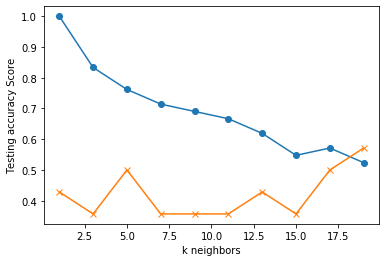

In [132]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
# YOUR CODE HERE
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [133]:
# Choose the best k from above and re-fit the KNN Classifier using that k value.
# print the score for the test data
# YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
print('k=20 Test Acc: %.3f' % knn.score(X_test, y_test))

k=20 Test Acc: 0.571


In [134]:
#support vector Machine (SVM)
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           C       1.00      0.29      0.44         7
           W       0.58      1.00      0.74         7

    accuracy                           0.64        14
   macro avg       0.79      0.64      0.59        14
weighted avg       0.79      0.64      0.59        14



In [138]:
#logistic regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [139]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
classifier.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8571428571428571
Testing Data Score: 0.8571428571428571


In [142]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
66957,W,W
17198,C,C
29975,C,C
56786,W,W
35377,C,C
33984,C,C
36876,W,W
68105,C,C
28012,C,C
6003,W,W


In [291]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
df = pd.read_csv("top_56_scorers.csv")
#get max number of games for anyone ever
maxgame = df['gameid'].max()
print(maxgame)
playerLastName = input("Player last name")
playerFirstName = input("Player first name")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1767
Player last nameLemieux
Player first nameMario


In [292]:
#DF of everyone BUT the player of choice
df_ALL = df[df['lastname'] != playerLastName]
df_ALL = df_ALL.dropna(how = "any")


#DF of ONLY Player of choice
df = df[df['lastname'] == playerLastName]
df = df.dropna(how = "any")
playerLastGame = df['gameid'].max()
#remove games before playerLastGame
df_ALL = df_ALL[df_ALL['gameid'] > playerLastGame]
df_ALL = df_ALL.drop(["id", "season", "sumgoals", "games"], axis = 1)
#average stats of all players for each game
df_ALL = df_ALL.groupby("gameid").mean().reset_index()

In [293]:

#calculate line of best fit
#X = df_ALL.drop("goals", axis = 1)
#idk what's happening here, try using just gameid
X = df_ALL["gameid"]
Y = df_ALL["goals"]
x, y = np.array(X).reshape(-1,1), np.array(Y)
# Fitting our model with all of our features in X
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)
y_pred = model.predict(x)
verticalLine = df['gameid'].max()
for x in range(len(y_pred)):
    new_row = {'gameid':X[x], 'goals': y_pred[x], 'sumgoals': df['sumgoals'].max()+y_pred[x]}
    #append row to the dataframe
    df = df.append(new_row, ignore_index=True)

    


coefficient of determination: 0.15709752999004134
intercept: 0.6275001239841995
slope: [-0.00024853]


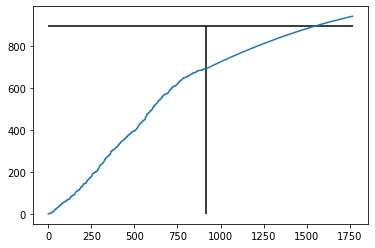

In [296]:
plt.plot(df['sumgoals'])
plt.hlines(y=894, xmin = 0, xmax = df['gameid'].max())
plt.vlines(x = verticalLine, ymin = 0, ymax=894)



AttributeError: module 'matplotlib.pyplot' has no attribute 'pltt'

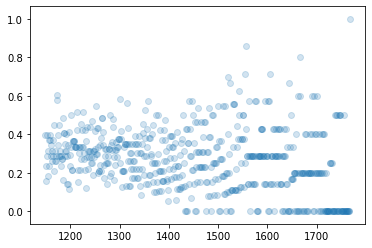

In [261]:
plt.scatter(df_ALL["gameid"], df_ALL["goals"], alpha=0.2)
plt.plt(np.unique(df_ALL["gameid"]), np.poly1d(np.polyfit(df_ALL["gameid"], df_ALL["goals"], 1))(np.unique(df_ALL["gameid"])), color = 'red')


In [148]:
# df_pos  = pd.get_dummies(df['pos'])
# df_opp  = pd.get_dummies(df['opp'])
# df_home = pd.get_dummies(df['home'])
# df_win  = pd.get_dummies(df['win'])
# df_merge = df.merge(df_pos, left_index = True, right_index = True)
# df_merge = df_merge.merge(df_opp, left_index = True, right_index = True)
# df_merge = df_merge.merge(df_home, left_index = True, right_index = True)
# df_merge = df_merge.merge(df_win, left_index = True, right_index = True)
# X = df_merge.drop(["firstname", "lastname", "sumgoals", "season", 'date', 'team', 'birthdate', 'pos', 'opp', 'home', 'win'], axis=1)
# y = df_merge['sumgoals']

# #train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# # Fitting our model with all of our features in X
# model.fit(X_train, y_train)

# score = model.score(X, y)
# print(f"R2 Score: {score}")
# print(f"Training Data Score: {model.score(X_train, y_train)}")
# print(f"Testing Data Score: {model.score(X_test, y_test)}")

R2 Score: 0.9970430505116833
Training Data Score: 0.9972626941450587
Testing Data Score: 0.9964166483497329


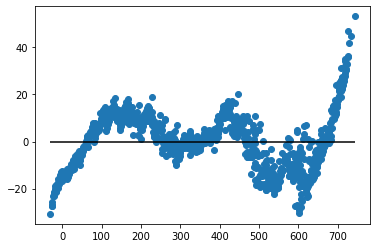

In [144]:
# predictions = model.predict(X)
# # Plot Residuals
# plt.scatter(predictions, predictions - y)
# plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
# plt.show()